# Annualized Return Pcnt: Daily data; Age > 90 and Age > 180

__Cumulative Rate of Return__ for strategies younger than 1 year.

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
           0      695422     -1.0000    -0.01047     0.03969      0.2408      0.2126   1441.1779      3.8989 


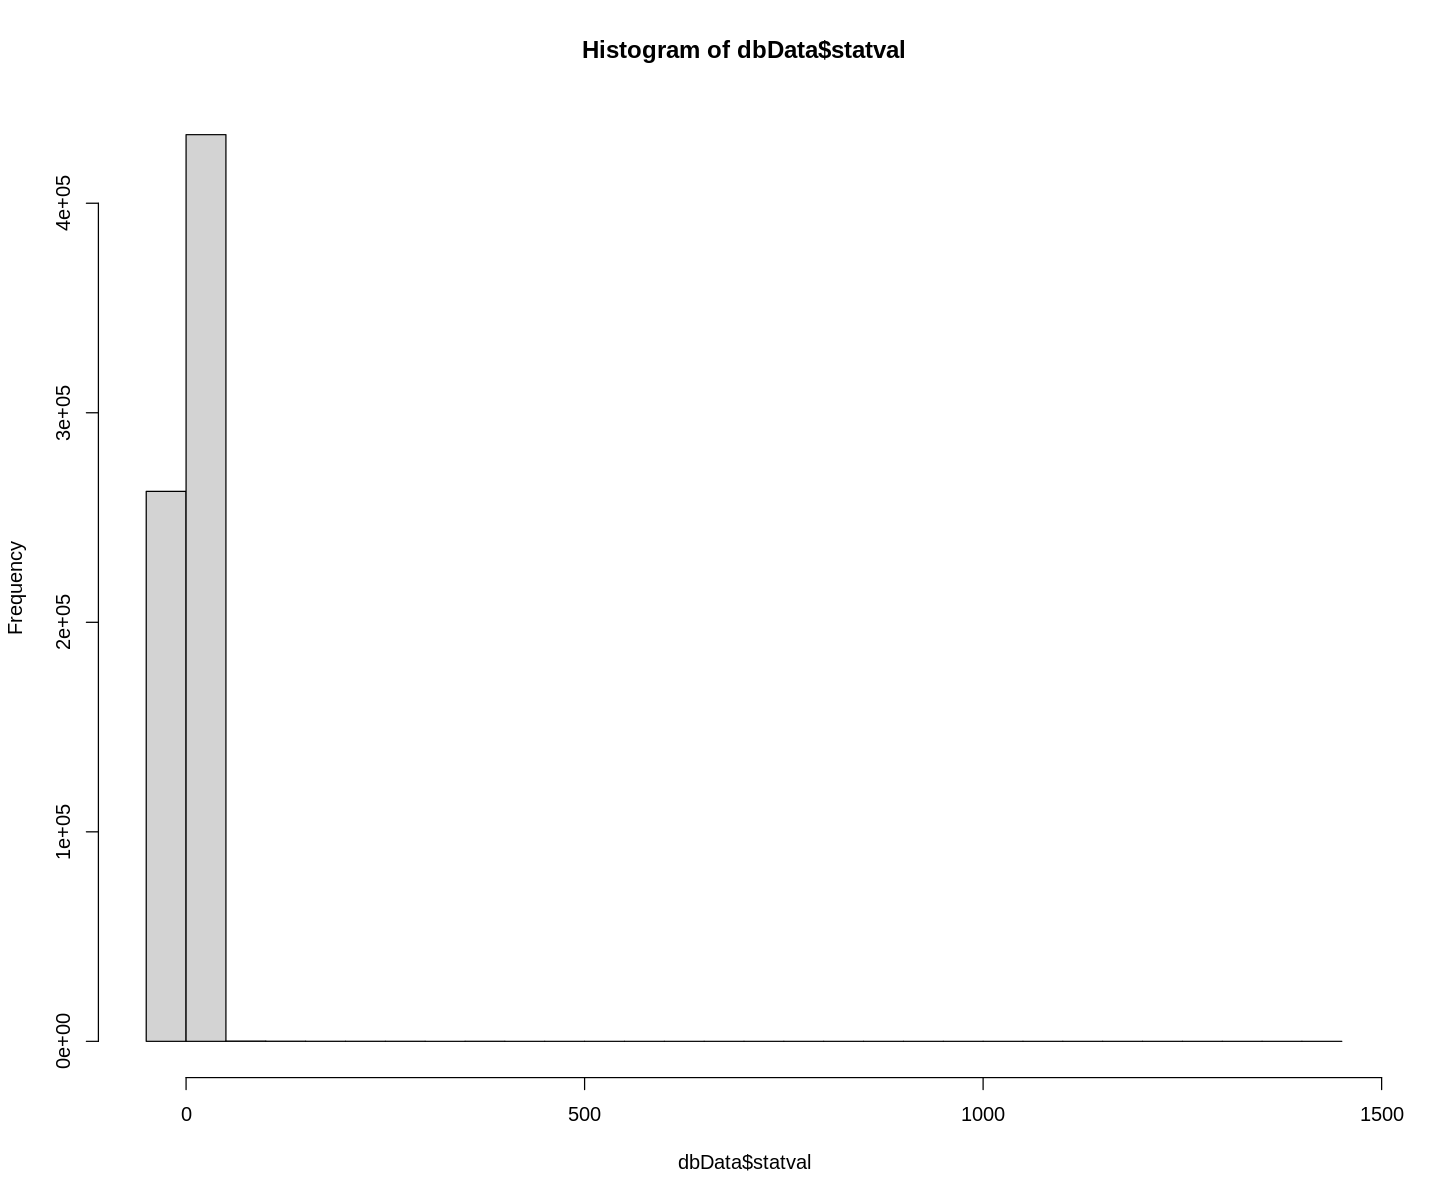

In [2]:
# Stats overview
sql = "select ReturnAnnual as statval from c2score_returnannual"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2202      235715      0.1000      0.1635      0.2603      0.3294      0.4346      1.0000      0.2123 


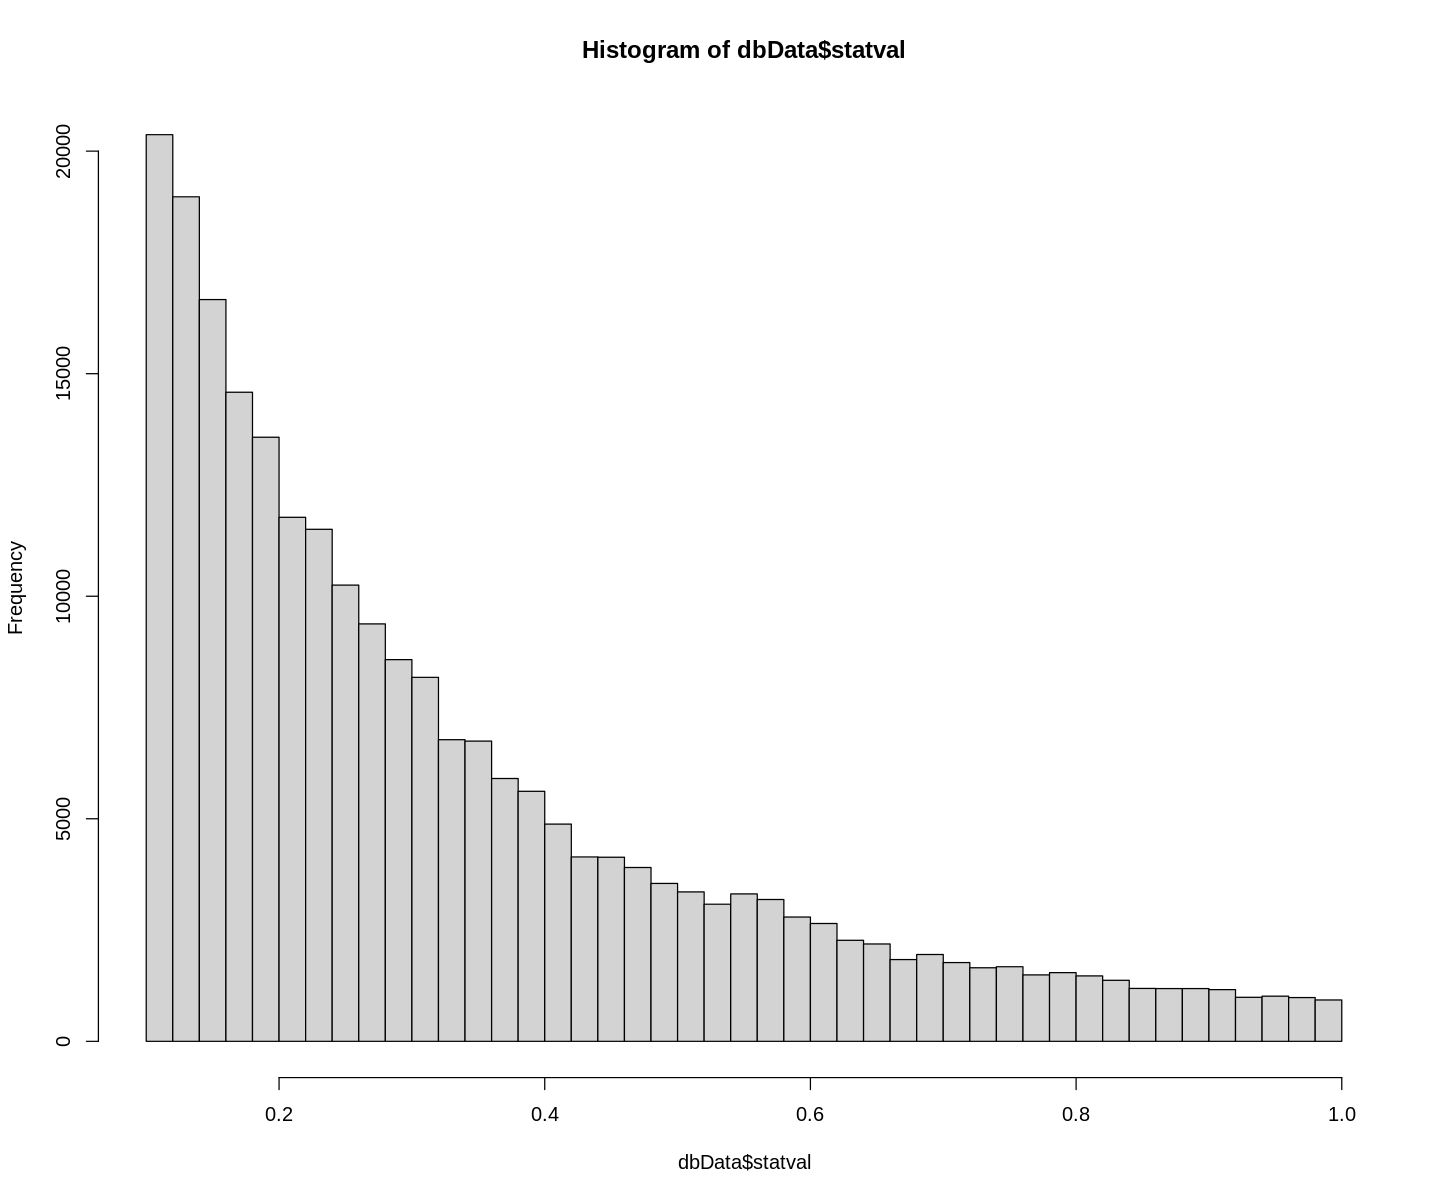

In [3]:
#Let's get reasonable stats values between 10% and 100%
sql = "select ReturnAnnual as statval, c2score_returnannual.* 
       from c2score_returnannual where ReturnAnnual > 0.1 and ReturnAnnual <= 1.0"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1081      181029      0.1000      0.1745      0.2776      0.3446      0.4613      1.0000      0.2158 


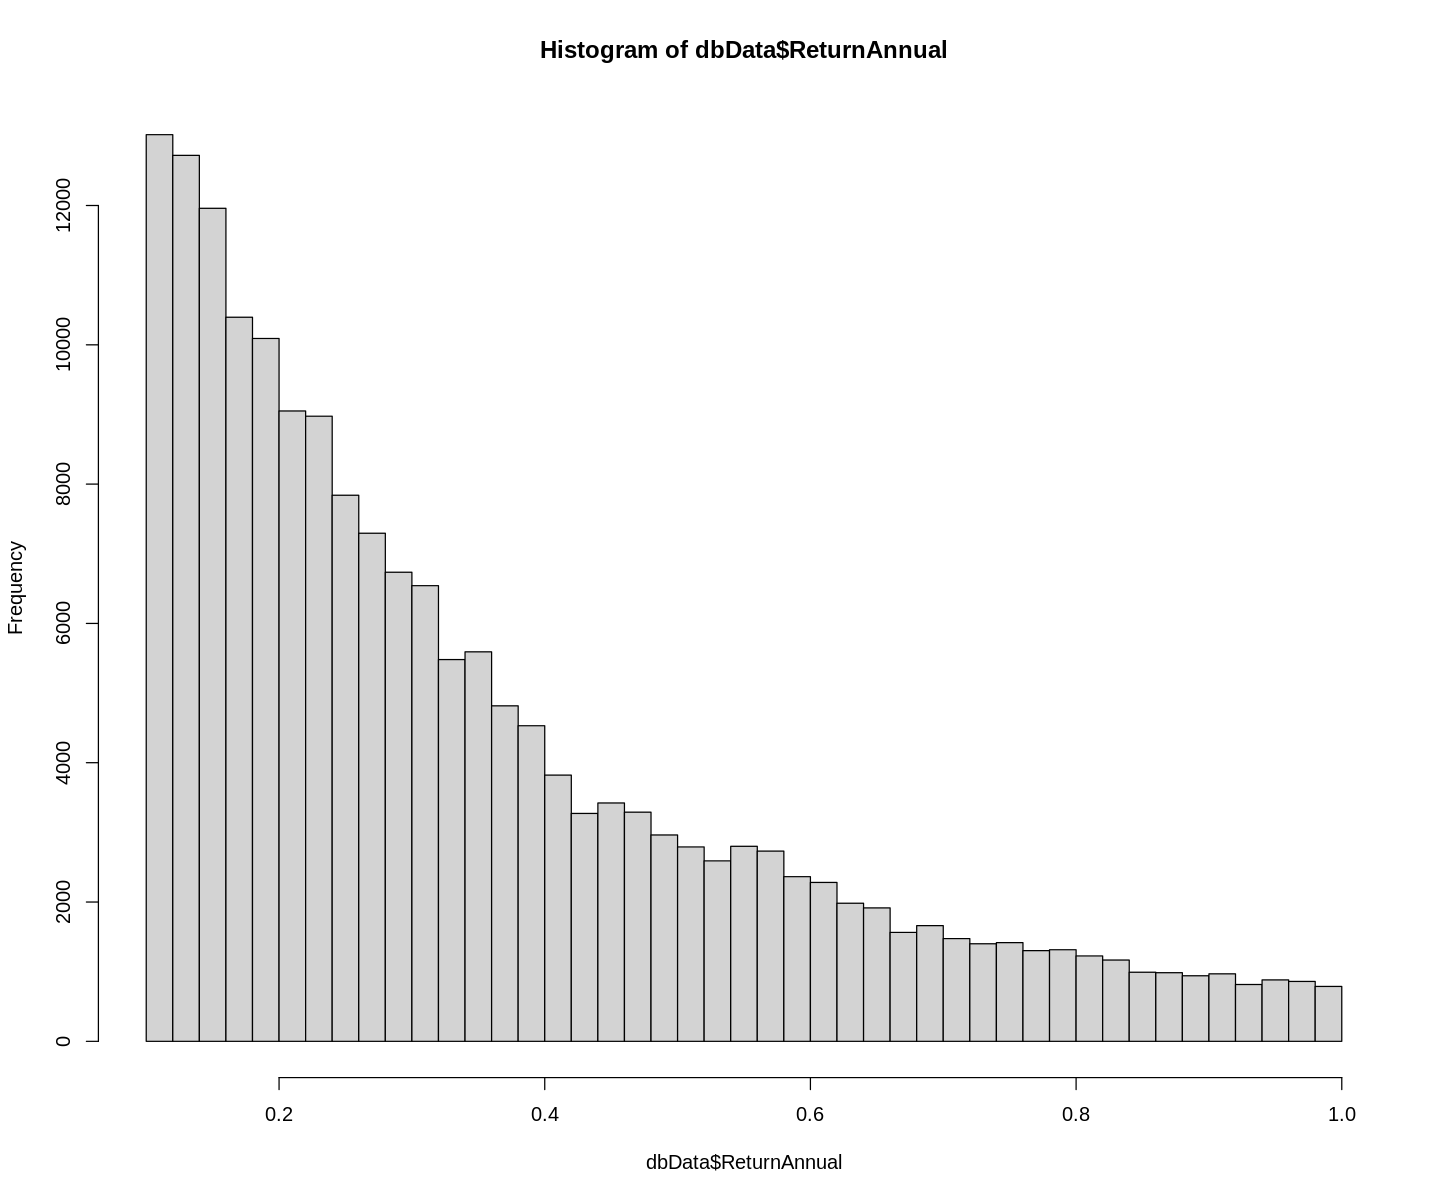

In [4]:
# Join it with our cleaned data and use Age > 90
sql = "select ReturnAnnual, r.* 
       from ReturnsDataInIntervalsCleanedSkip090 r 
       join c2score_returnannual retann on retann.systemid=r.systemid and retann.Date = r.DateStart
        where ReturnAnnual > 0.1 and ReturnAnnual <= 1.0  and Age > 90"
dbData = getC2ScoreDbData(sql)
overview(dbData,"ReturnAnnual")
hist(dbData$ReturnAnnual,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1081      181029      0.1000      0.1745      0.2776      0.3446      0.4613      1.0000      0.2158 



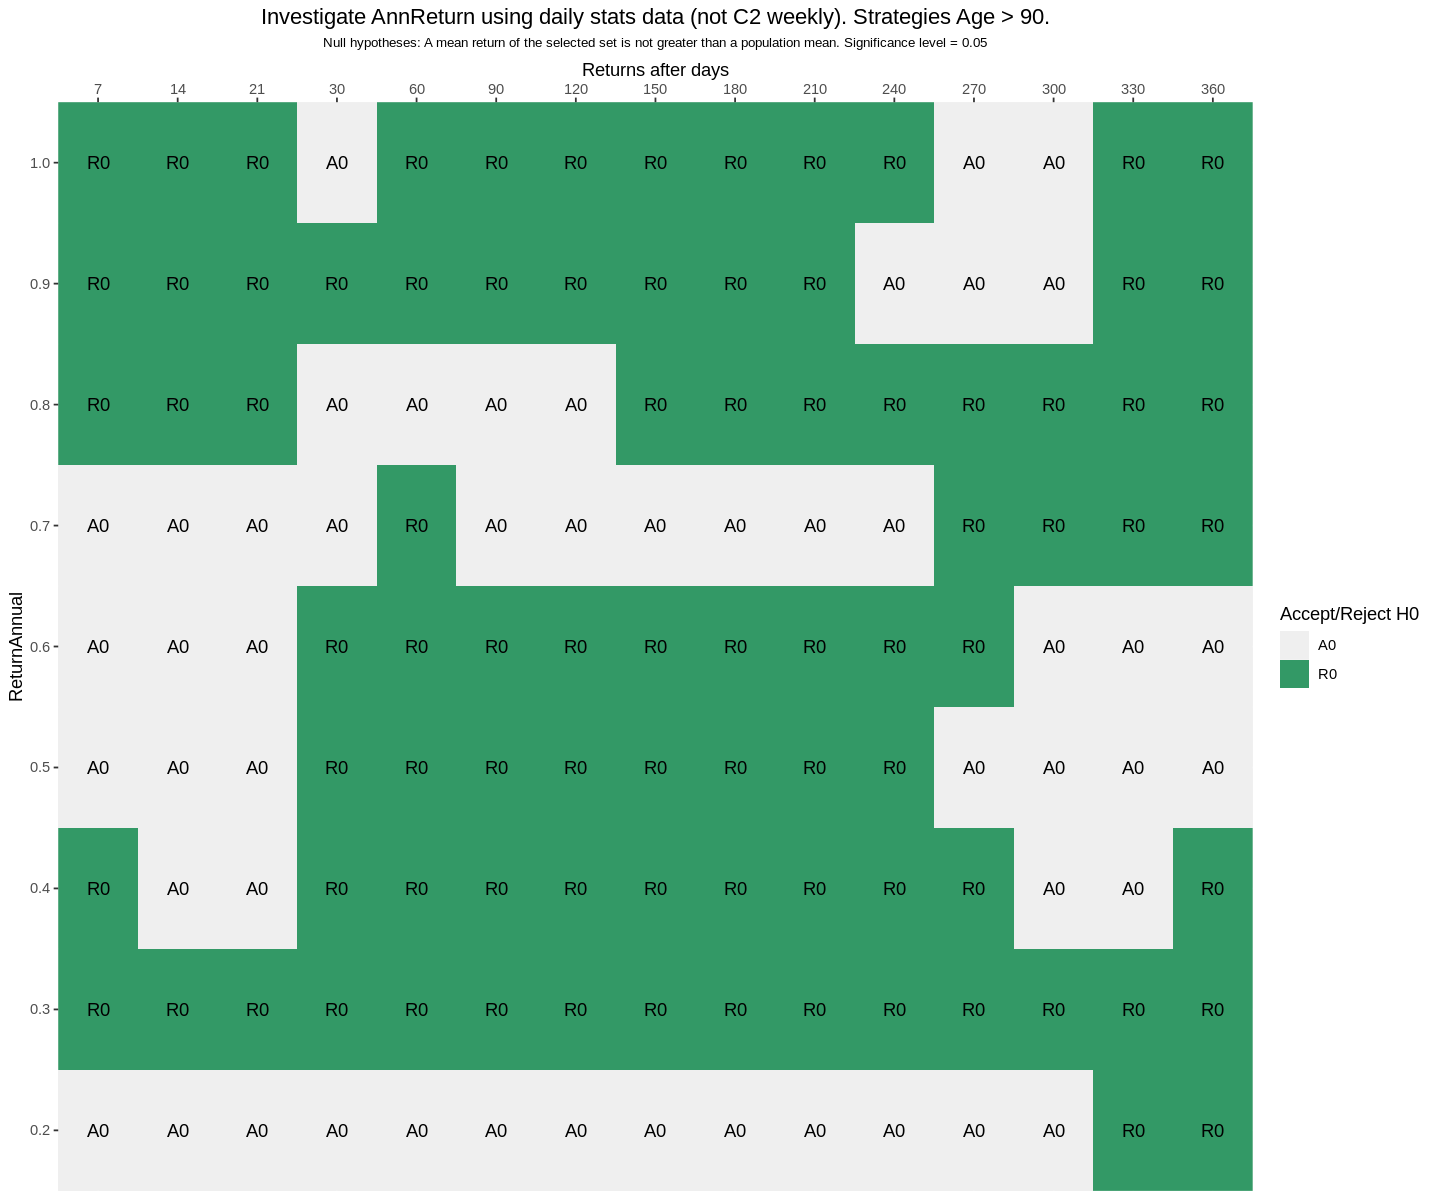

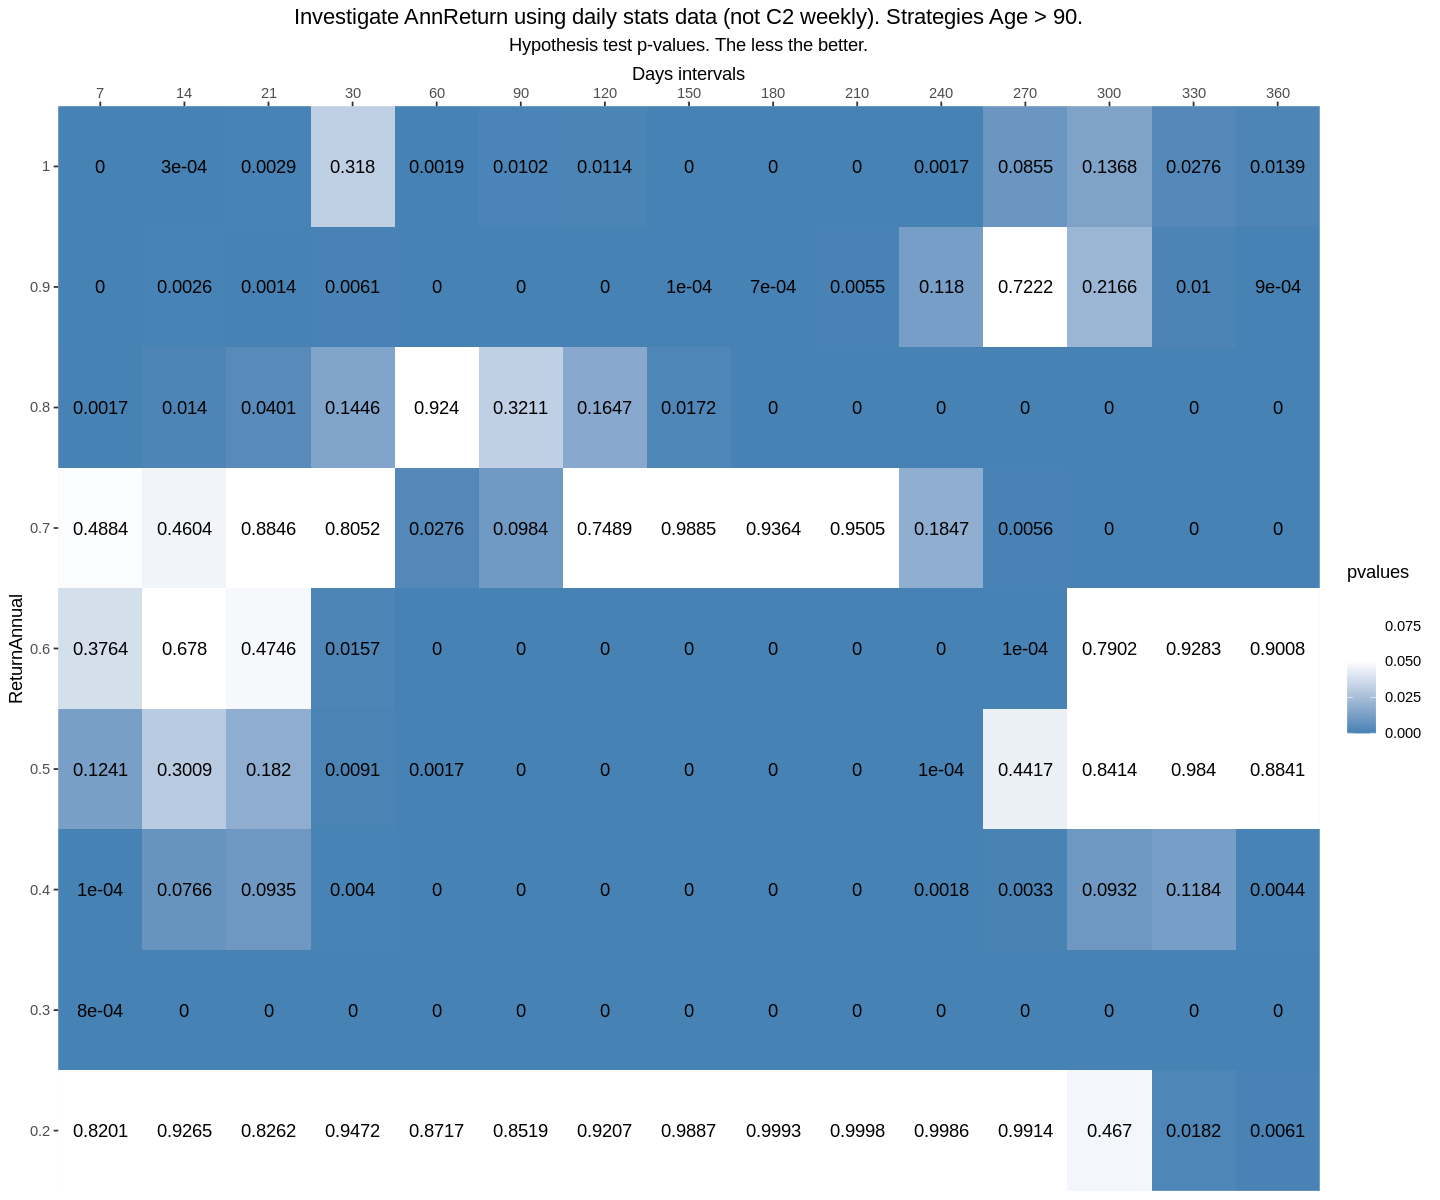

In [5]:
experiment = list(
  name = "AnnReturn daily, Age > 90",
  description = "Investigate AnnReturn using daily stats data (not C2 weekly). Strategies Age > 90.",
  sqlText = sql, # the latest sql above
  attributeName = "ReturnAnnual",
  attributeSteps = seq(from = 0.1, to = 1.0, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


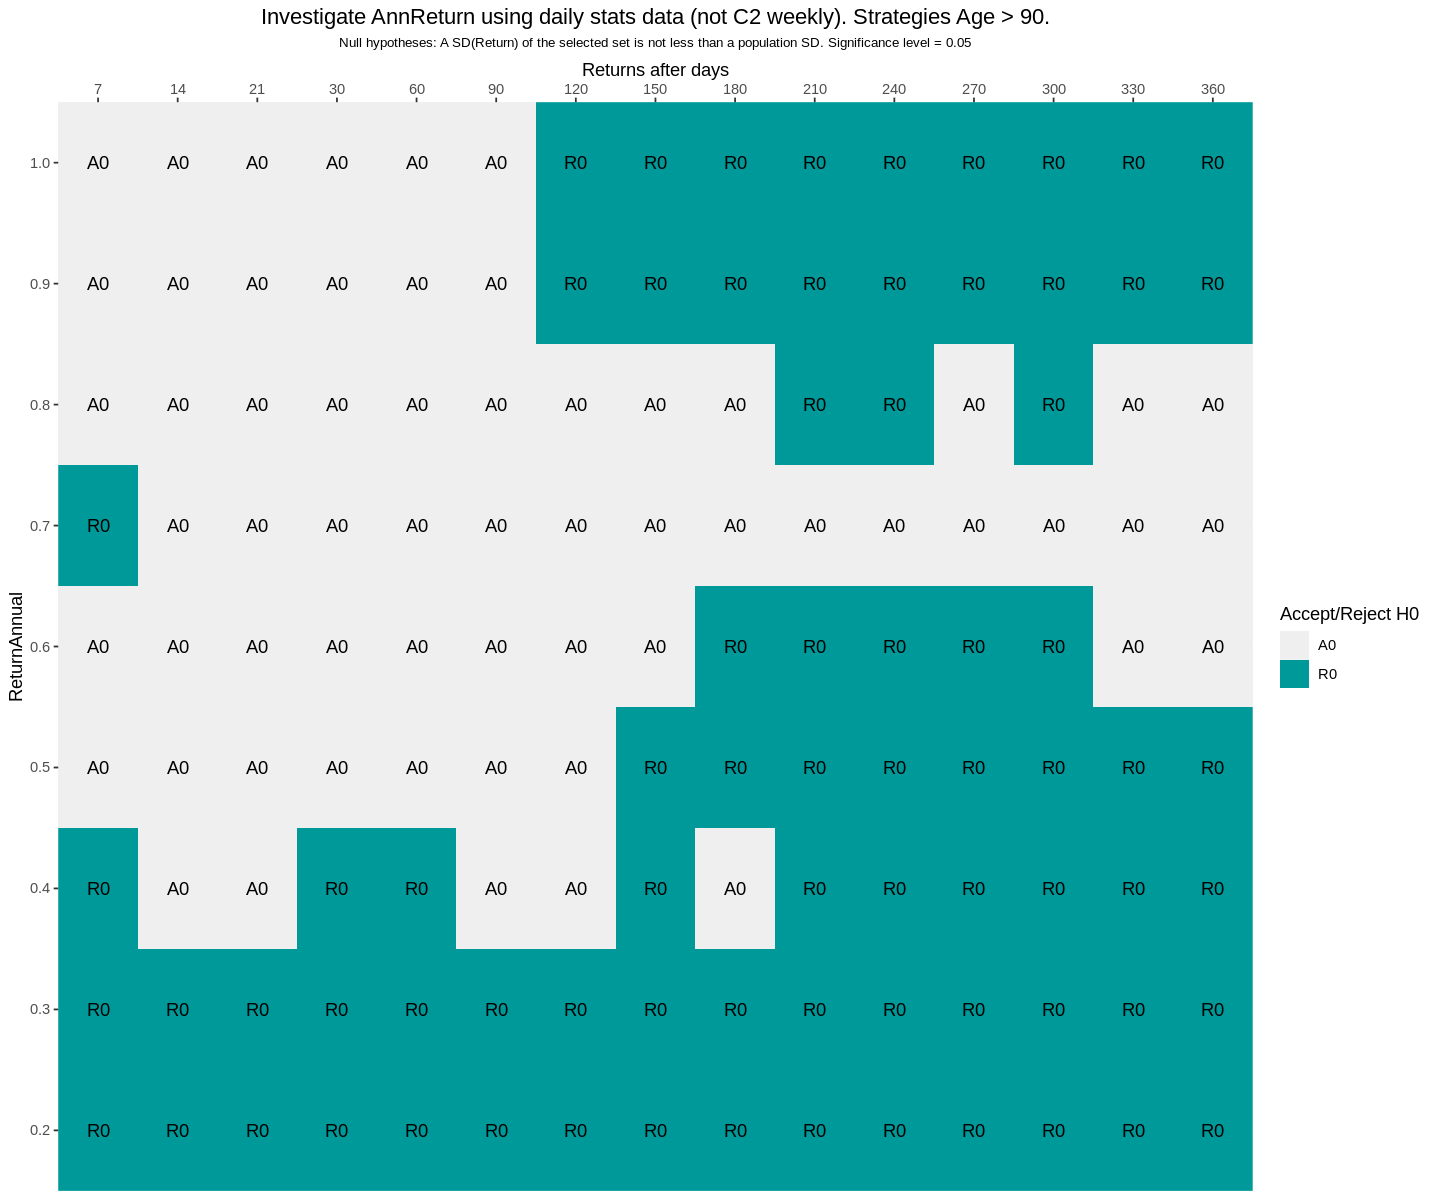

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= ReturnAnnual < 1,4285,4263,4236,4184,3946,3721,3434,3175,2901,2697,2423,2079,1867,1660,1477
0.8 <= ReturnAnnual < 0.9,5283,5237,5201,5138,4919,4507,4071,3765,3542,3198,2874,2637,2275,1913,1694
0.7 <= ReturnAnnual < 0.8,6863,6786,6718,6633,6269,5752,5243,4744,4276,3917,3652,3409,2930,2525,2259
0.6 <= ReturnAnnual < 0.7,9300,9209,9110,8949,8442,7853,7182,6518,5905,5335,4883,4241,3675,3213,2863
0.5 <= ReturnAnnual < 0.6,13142,12961,12761,12502,11775,10862,9658,8541,7552,6729,5949,5304,4875,4283,3819
0.4 <= ReturnAnnual < 0.5,16571,16338,16073,15710,14647,13543,12331,11150,9972,8969,8076,7294,6542,6031,5535
0.3 <= ReturnAnnual < 0.4,26559,26144,25724,25189,23400,21476,19599,17793,16185,14599,13262,12190,11195,10247,9406
0.2 <= ReturnAnnual < 0.3,39254,38653,38001,37136,34403,31641,28702,25953,23684,21559,19634,17890,16537,15330,14263
0.1 <= ReturnAnnual < 0.2,56925,55570,54194,52564,47150,41875,36567,32591,28886,25726,23081,20963,19050,17483,16286



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



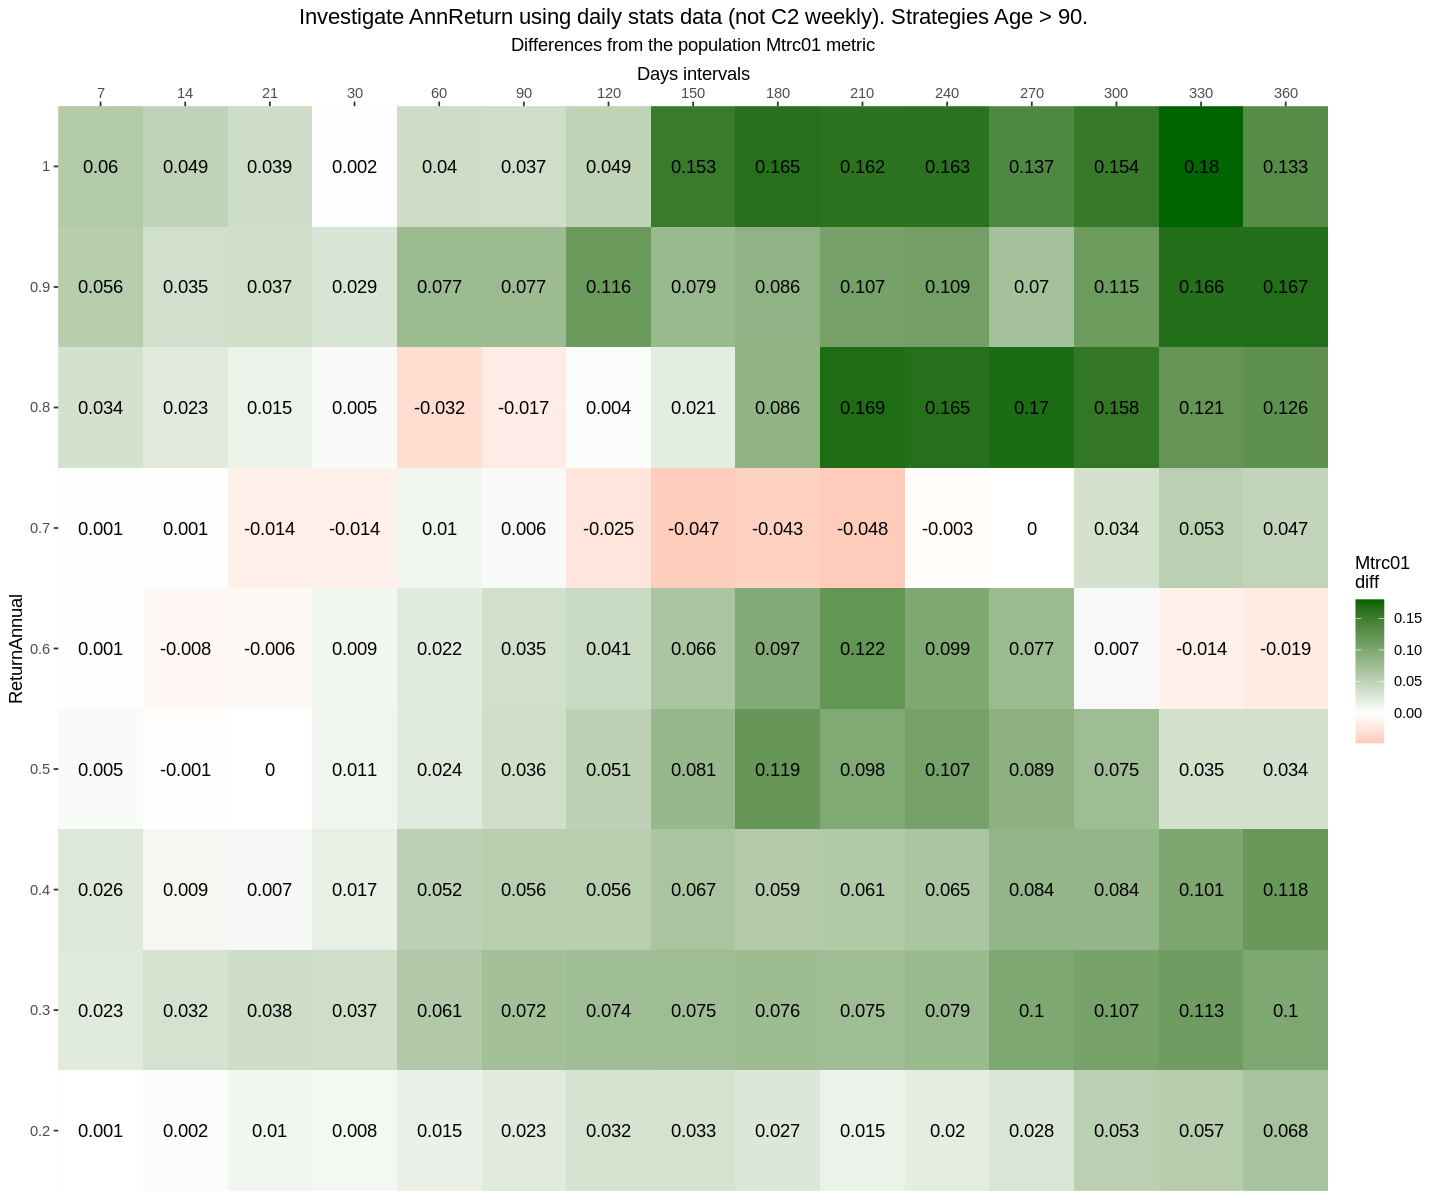

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= ReturnAnnual < 1,199,198,198,198,190,183,174,163,155,147,141,132,118,110,98
0.8 <= ReturnAnnual < 0.9,228,228,228,228,219,209,190,176,169,159,147,143,127,113,105
0.7 <= ReturnAnnual < 0.8,269,265,264,261,248,233,218,203,186,176,167,160,147,131,119
0.6 <= ReturnAnnual < 0.7,301,298,294,287,269,253,236,219,202,189,179,168,154,139,129
0.5 <= ReturnAnnual < 0.6,366,362,355,340,317,295,281,261,240,224,213,194,181,162,144
0.4 <= ReturnAnnual < 0.5,436,426,419,402,364,340,317,292,270,245,230,216,192,178,159
0.3 <= ReturnAnnual < 0.4,538,524,508,485,421,385,350,316,289,264,245,230,211,191,174
0.2 <= ReturnAnnual < 0.3,673,655,634,606,539,475,427,376,336,313,284,248,223,208,189
0.1 <= ReturnAnnual < 0.2,865,845,810,780,668,583,495,441,384,347,296,256,237,217,194


### Discussion

Annual Return around 25% looks like the best bet. Age > 90 days in this experiment. 95% confidence level.

Do not forget that Annual Return can be just a fiction. 70% of strategies do not live for 1 year. Consider it rather as ROC.

## Age > 180

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         695      138741      0.1000      0.1815      0.2845      0.3488      0.4647      1.0000      0.2139 


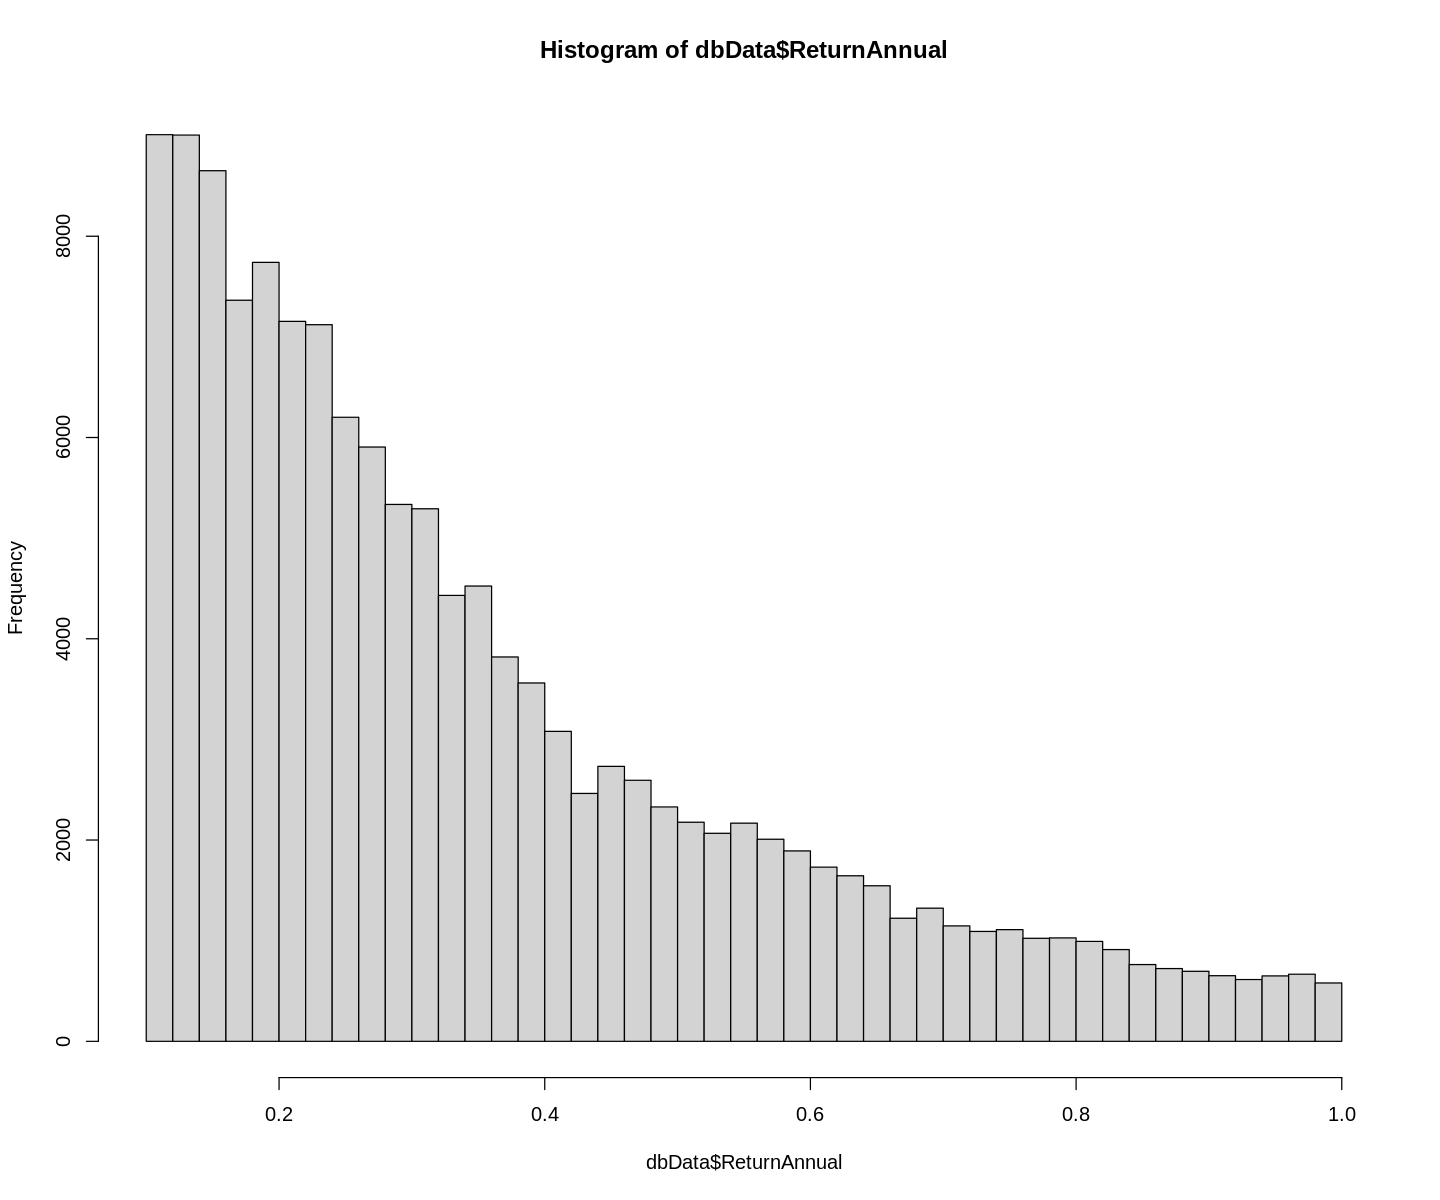

In [10]:
# Join it with our cleaned data and use Age > 90
sql = "select ReturnAnnual, r.* 
       from ReturnsDataInIntervalsCleanedSkip090 r 
       join c2score_returnannual retann on retann.systemid=r.systemid and retann.Date = r.DateStart
        where ReturnAnnual > 0.1 and ReturnAnnual <= 1.0  and Age > 180"
dbData = getC2ScoreDbData(sql)
overview(dbData,"ReturnAnnual")
hist(dbData$ReturnAnnual,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         695      138741      0.1000      0.1815      0.2845      0.3488      0.4647      1.0000      0.2139 



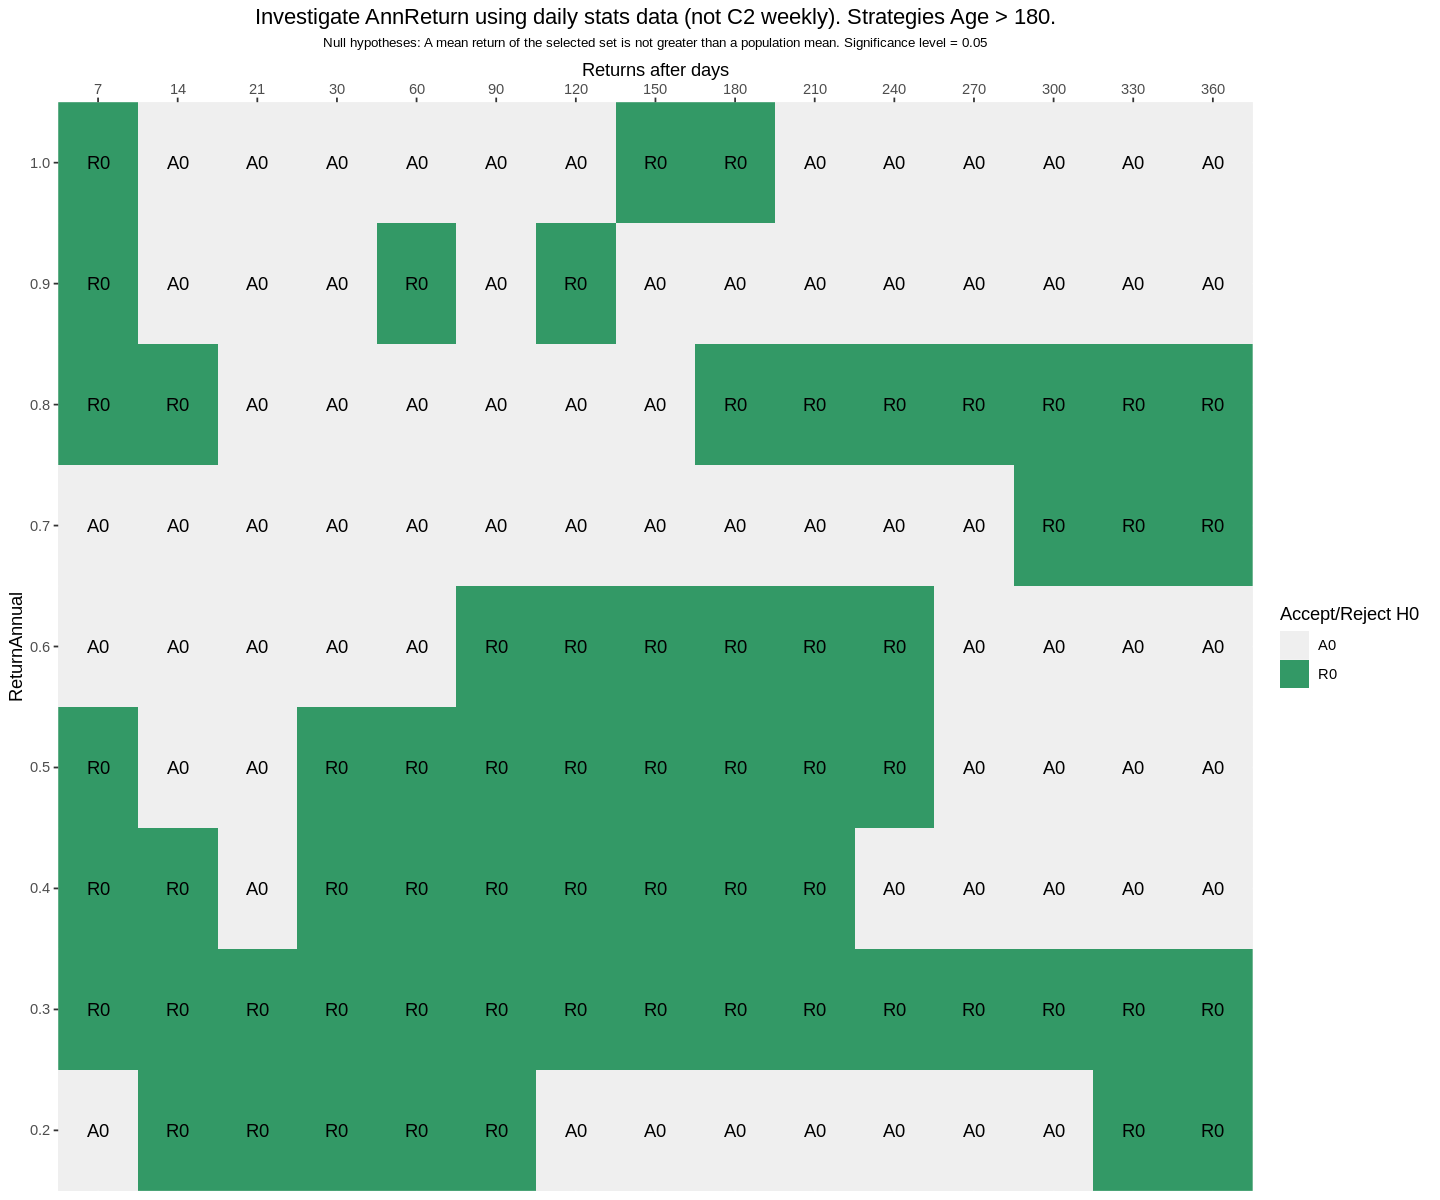

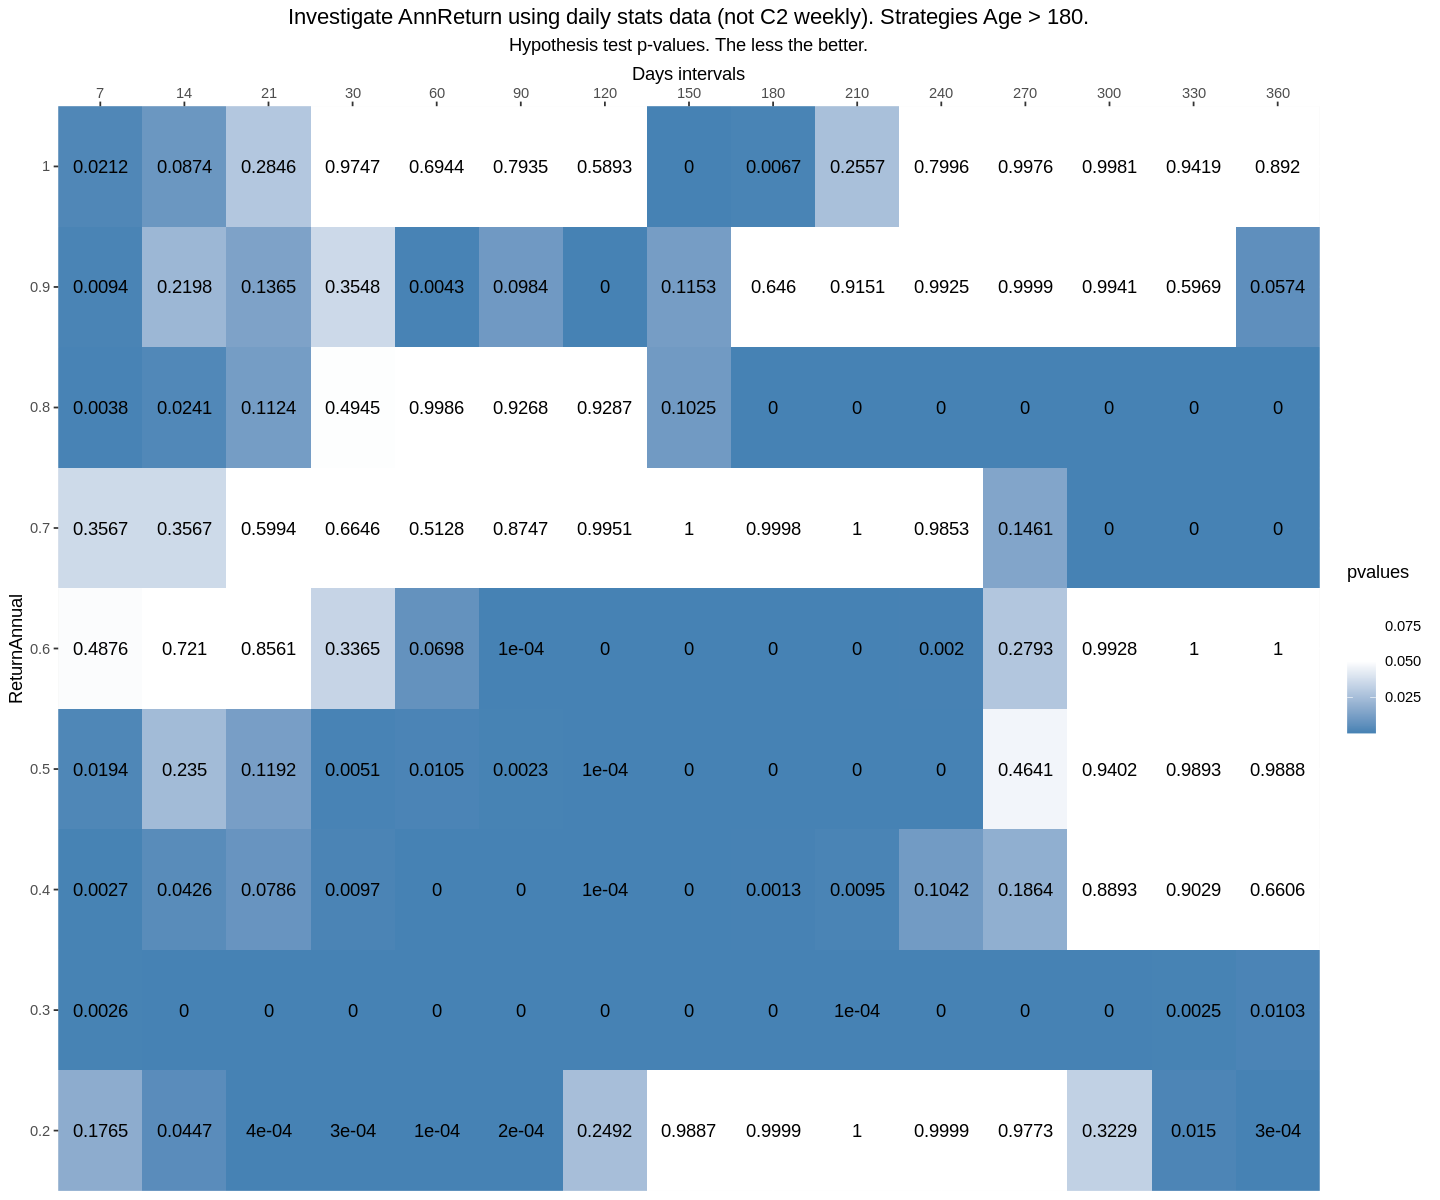

In [11]:
experiment = list(
  name = "AnnReturn daily, Age > 180",
  description = "Investigate AnnReturn using daily stats data (not C2 weekly). Strategies Age > 180.",
  sqlText = sql, # the latest sql above
  attributeName = "ReturnAnnual",
  attributeSteps = seq(from = 0.1, to = 1.0, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


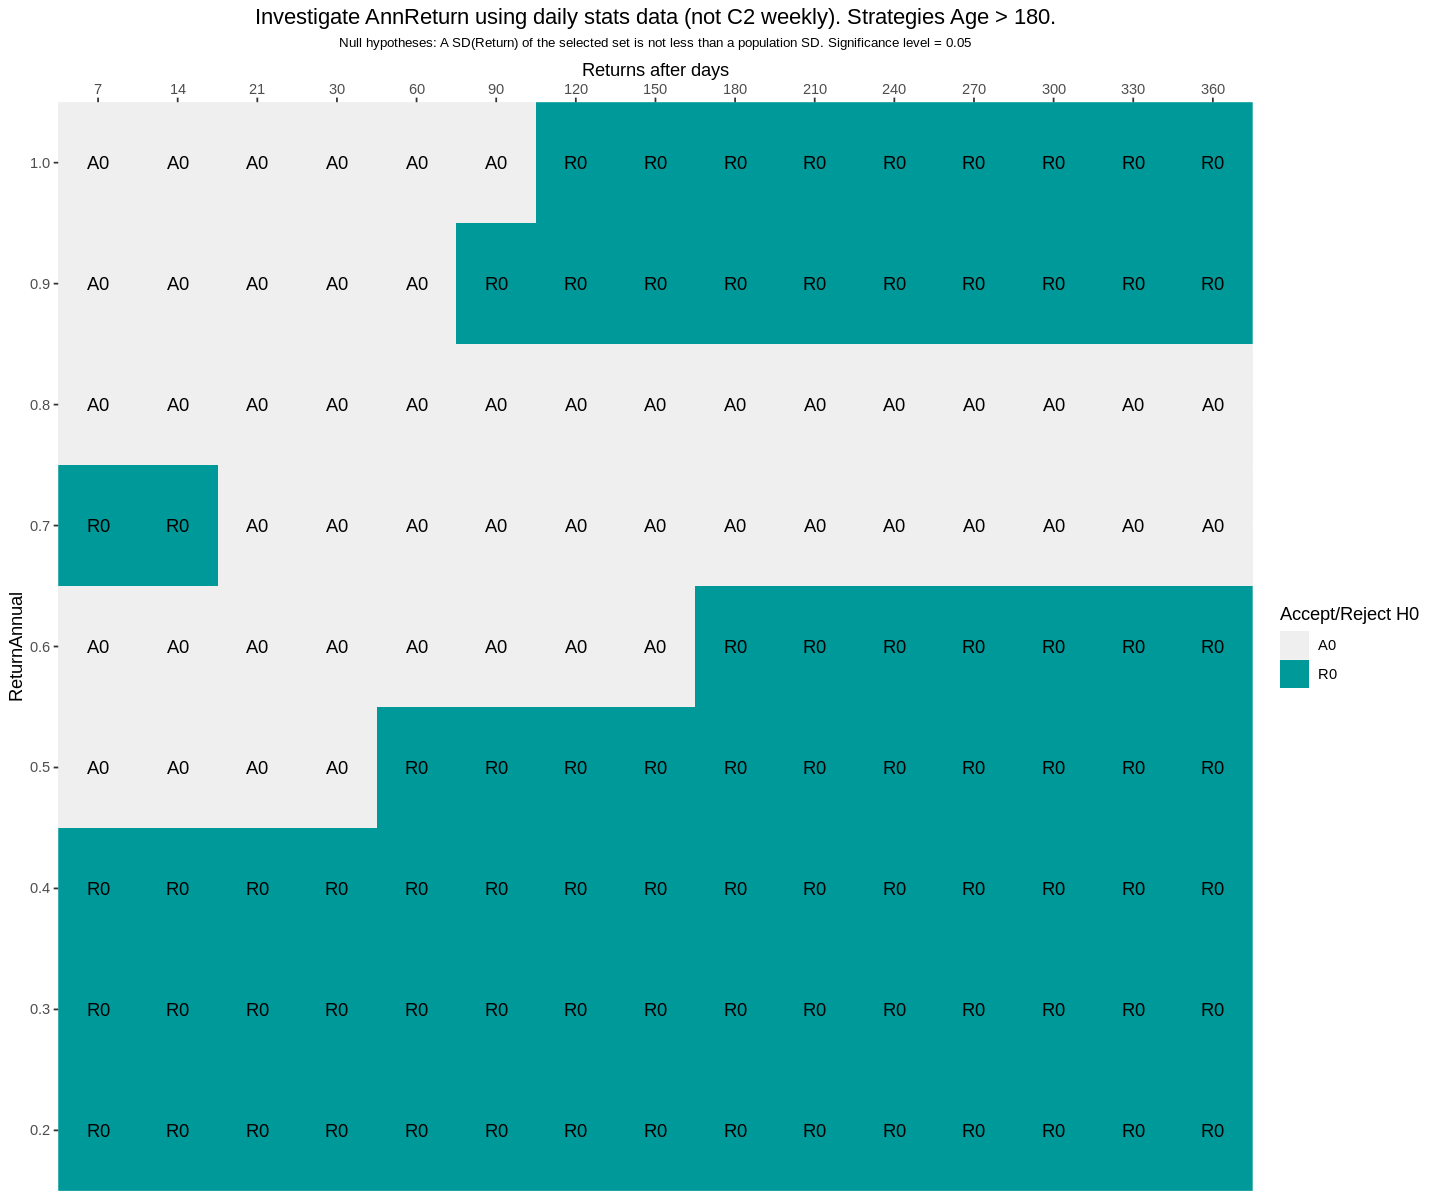

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= ReturnAnnual < 1,3135,3113,3090,3046,2873,2688,2448,2223,1970,1807,1593,1367,1253,1102,981
0.8 <= ReturnAnnual < 0.9,4070,4035,4005,3962,3828,3488,3115,2859,2651,2335,2083,1906,1661,1429,1267
0.7 <= ReturnAnnual < 0.8,5365,5312,5265,5201,4911,4496,4059,3671,3269,2996,2834,2662,2326,2061,1849
0.6 <= ReturnAnnual < 0.7,7392,7329,7257,7153,6796,6330,5766,5156,4621,4207,3829,3316,2889,2544,2264
0.5 <= ReturnAnnual < 0.6,10239,10115,9989,9844,9352,8590,7570,6679,5942,5305,4665,4205,3908,3515,3131
0.4 <= ReturnAnnual < 0.5,13051,12925,12777,12536,11784,10873,9882,8911,7902,7112,6426,5809,5293,4934,4558
0.3 <= ReturnAnnual < 0.4,21371,21093,20797,20420,19126,17671,16207,14711,13421,12236,11191,10426,9652,8872,8181
0.2 <= ReturnAnnual < 0.3,31277,30868,30424,29869,28178,26286,24011,21793,19946,18372,17089,15765,14584,13485,12536
0.1 <= ReturnAnnual < 0.2,41018,40206,39407,38457,35276,31882,28393,25765,23363,21336,19615,18266,16827,15629,14642



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



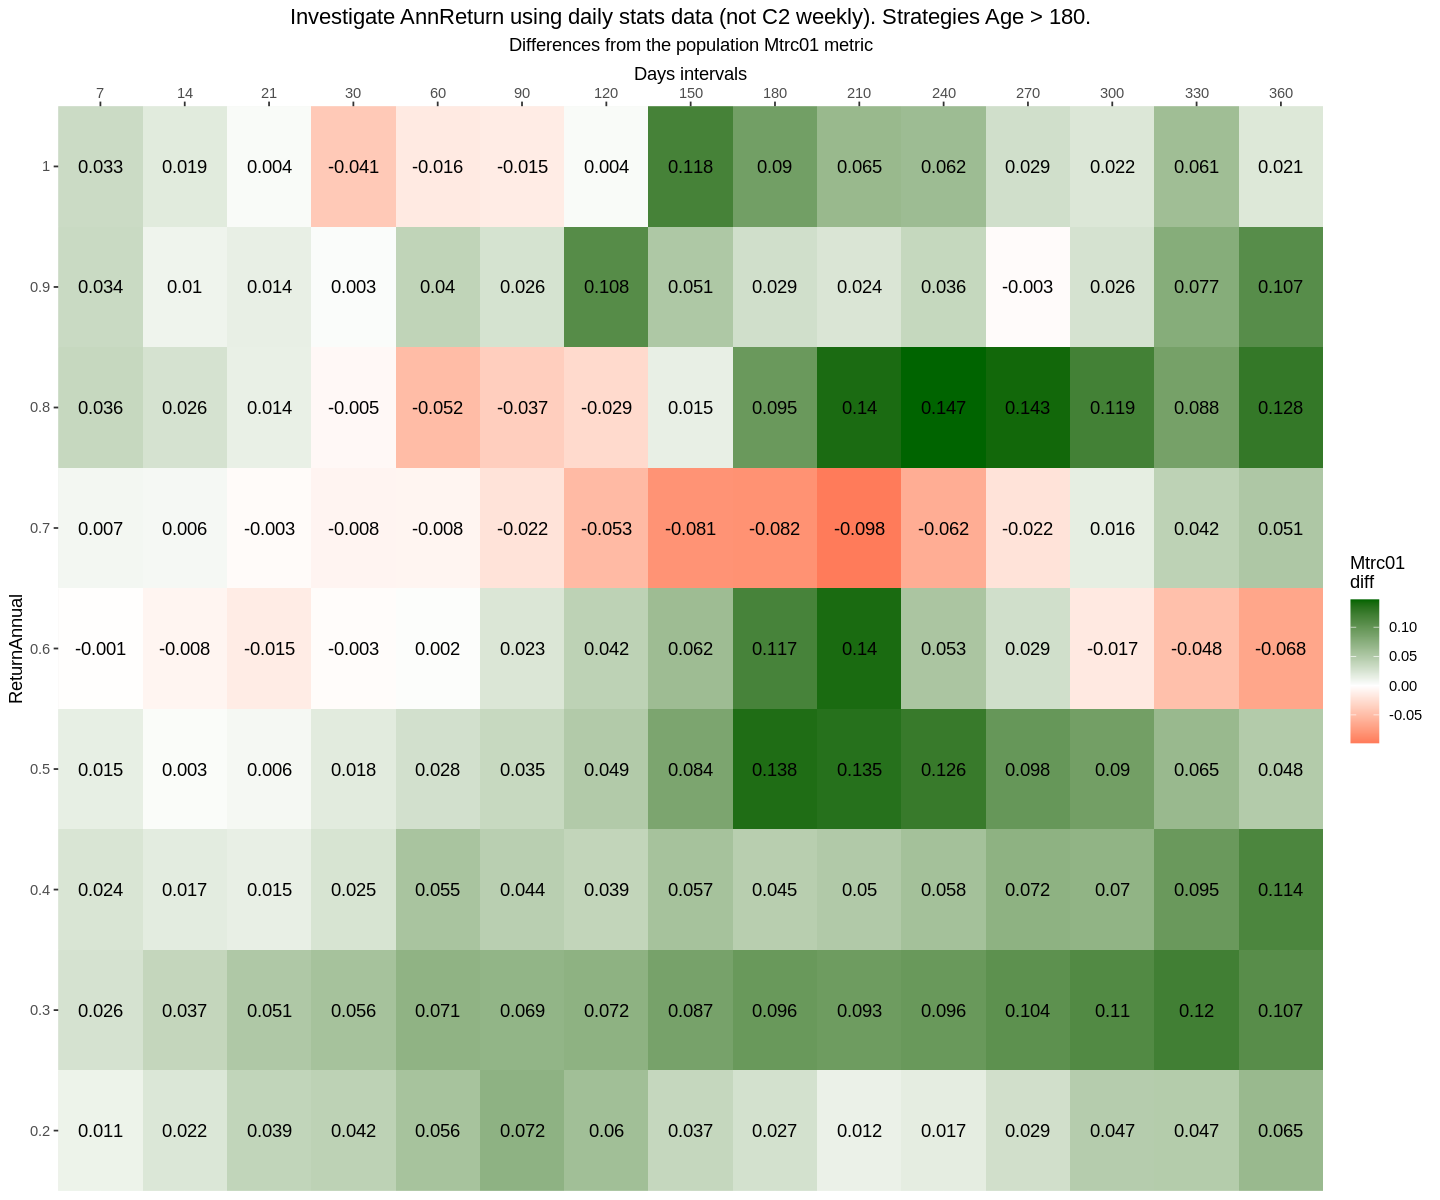

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= ReturnAnnual < 1,151,148,148,147,142,137,130,119,111,102,93,81,72,67,61
0.8 <= ReturnAnnual < 0.9,172,172,169,169,163,157,139,130,121,113,99,94,88,78,72
0.7 <= ReturnAnnual < 0.8,194,193,191,191,184,173,160,150,133,122,111,108,100,88,83
0.6 <= ReturnAnnual < 0.7,221,221,218,215,207,196,183,169,150,139,129,118,110,101,94
0.5 <= ReturnAnnual < 0.6,262,259,255,251,241,228,216,193,178,165,149,133,123,116,105
0.4 <= ReturnAnnual < 0.5,294,286,286,277,261,243,228,211,188,169,153,139,127,121,106
0.3 <= ReturnAnnual < 0.4,354,346,337,328,303,282,264,241,220,194,178,165,154,139,126
0.2 <= ReturnAnnual < 0.3,414,407,398,386,357,322,291,259,229,206,189,173,160,145,137
0.1 <= ReturnAnnual < 0.2,516,507,490,482,419,379,332,283,243,222,196,184,176,163,147


### Discussion

The same result as for 90 days: Annual return around 25% looks like the best bet. 

Age > 180 days in this experiment. 95% confidence level.

Do not forget that Annual Return can be just a fiction. 70% of strategies do not live for 1 year. Consider it rather as ROC.